# MOVIE RATING MODEL PREPROCESSING
This project aims to develop a cleaned dataset that can be used to predict the rating of a movie based on its year of release, name, director and more.

## IMPORTING NECESSARY LIBRARIES

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
%matplotlib inline

## LOADING DATASET

In [ ]:
df=pd.read_csv("IMDb Movies India.csv", encoding='latin-1')

## READING DATASET


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,7.0,2019.0,109.0,6.185870,7.0,8.0,7.000000,6.850000,7.000000,7.000000
2,6.0,2021.0,90.0,6.430556,6.0,55.0,6.000000,6.500000,6.900000,6.000000
3,4.4,2019.0,110.0,5.733582,4.4,35.0,4.400000,5.420000,4.400000,4.450000
4,6.0,2010.0,105.0,6.185870,6.0,55.0,6.285714,6.833333,5.800000,5.600000
5,4.7,1997.0,147.0,6.224490,4.7,827.0,5.358824,4.788889,5.786667,5.813333
6,7.4,2005.0,142.0,6.820000,7.4,1086.0,7.500000,5.328000,6.050000,6.444444
8,5.6,2012.0,82.0,5.546154,5.6,326.0,5.600000,5.600000,5.883333,5.600000
9,4.0,2014.0,116.0,5.377778,4.0,11.0,4.000000,4.000000,4.550000,4.000000
10,6.2,2004.0,96.0,6.185870,6.2,17.0,6.200000,5.500000,5.622727,5.425000
11,5.9,2016.0,120.0,5.262869,5.9,59.0,6.633333,5.862500,5.900000,5.900000


+ DROPPING DUPLICATE COLUMNS

In [ ]:
df.drop_duplicates(inplace=True)

## ANALYSING DATA

+ LINEPLOT

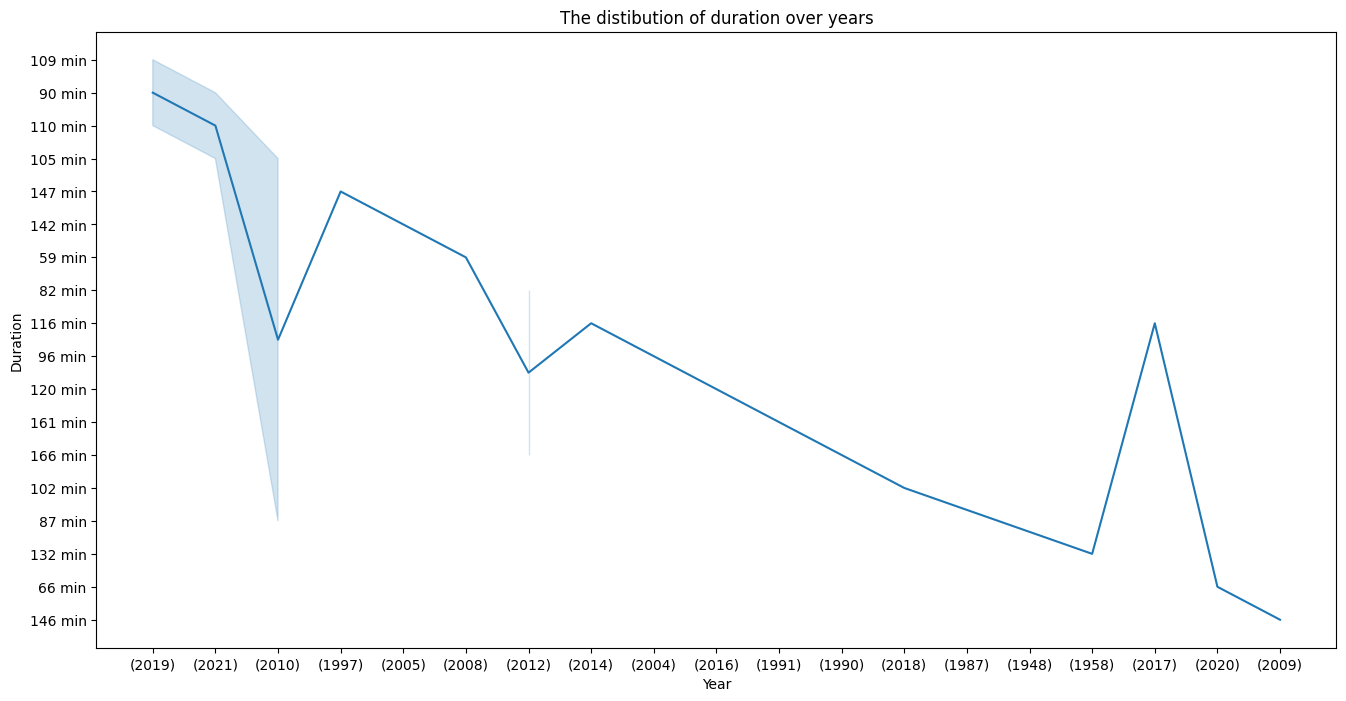

In [ ]:
plt.figure(figsize=(16, 8))
sns.lineplot(data=df.head(30),x='Year',y='Duration')
plt.title('The distibution of duration over years')
plt.show()

+ BARPLOT

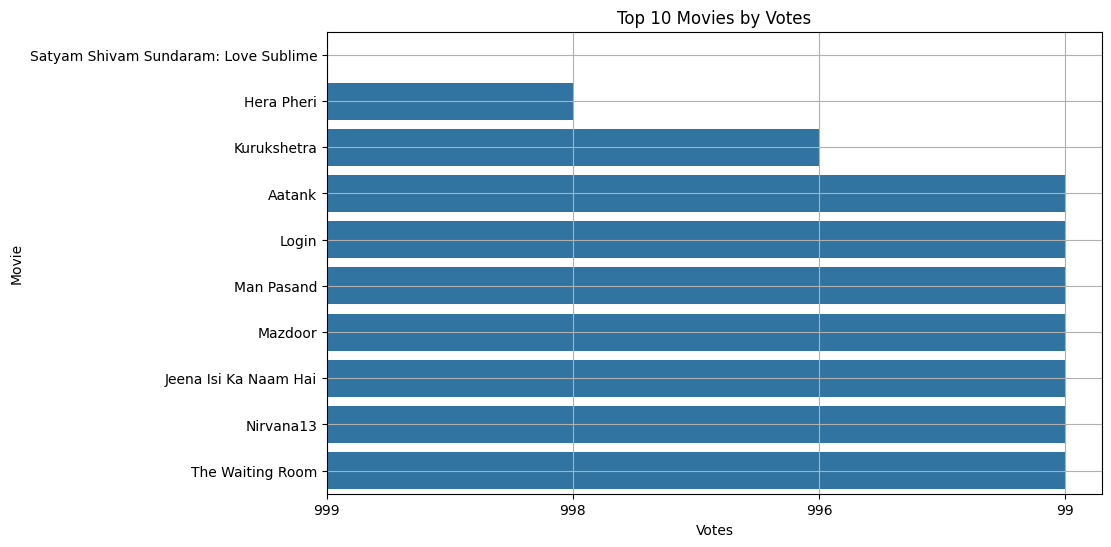

In [ ]:
top_movies_votes = df.sort_values(by='Votes', ascending=False).dropna(subset=['Votes']).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_movies_votes['Votes'], y=top_movies_votes['Name'], orient='h')
plt.title('Top 10 Movies by Votes')
plt.xlabel('Votes')
plt.ylabel('Movie')
plt.grid(True)
plt.show()


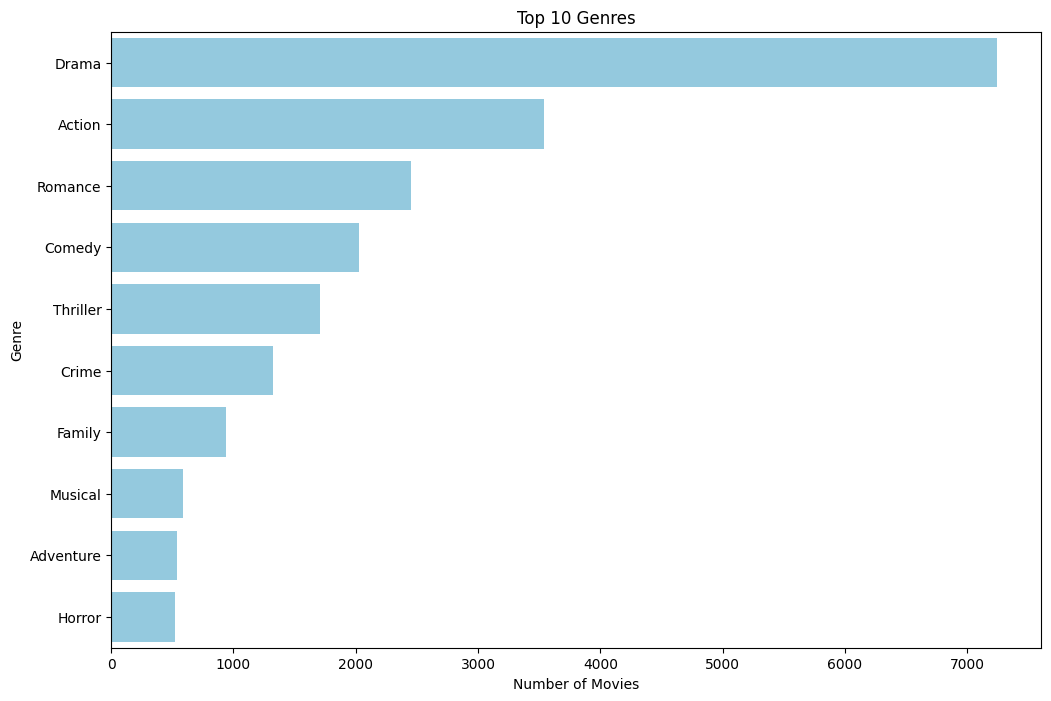

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,Drama,NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Homecoming,(2021),90 min,Musical,NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
4,#Yaaram,(2019),110 min,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor


In [ ]:
df['Genre'] = df['Genre'].str.split(', ')
genrevalues= df.explode('Genre').reset_index(drop=True)
top= genrevalues['Genre'].value_counts().head(10)

plt.figure(figsize=(12, 8))
sns.barplot(y=top.index, x=top.values,color='skyblue')
plt.title('Top 10 Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()
genrevalues.head()

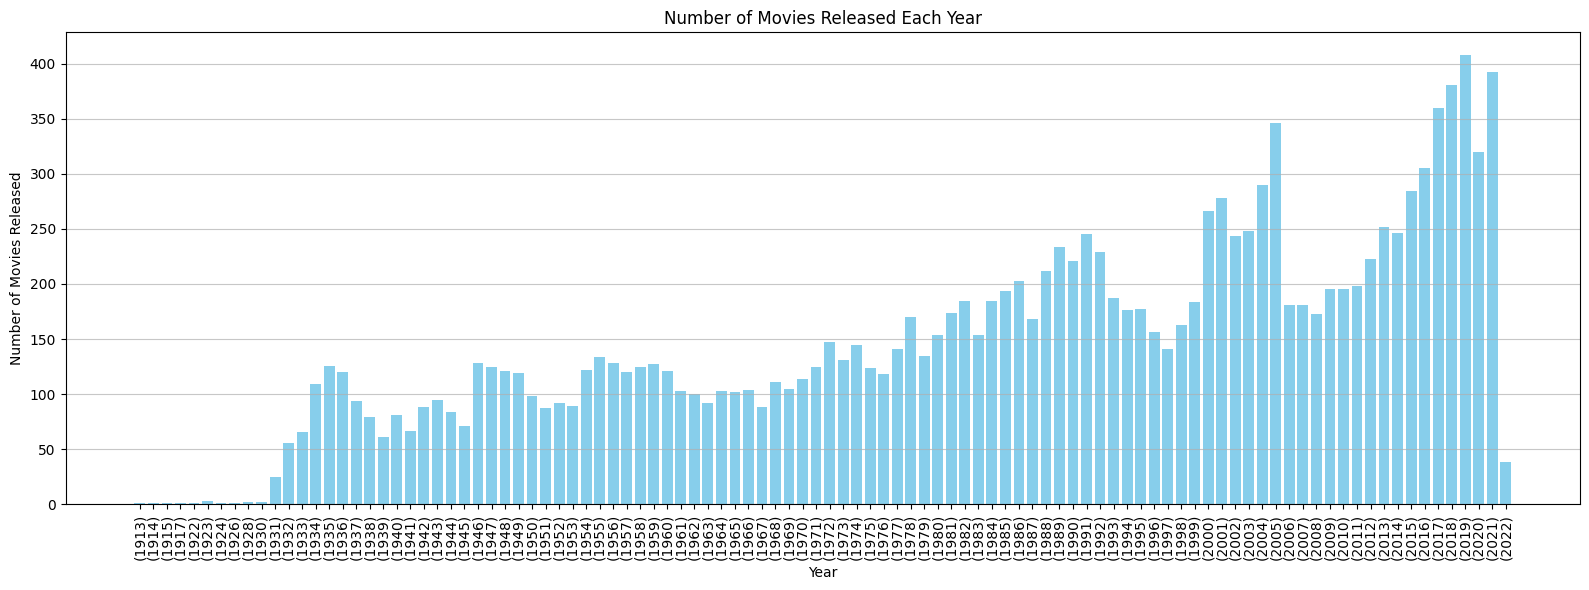

In [ ]:
movies_per_year = df['Year'].value_counts().sort_index()

colors = ['skyblue']
plt.figure(figsize=(16, 6))
plt.bar(movies_per_year.index, movies_per_year.values, color=colors)
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.title('Number of Movies Released Each Year')
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

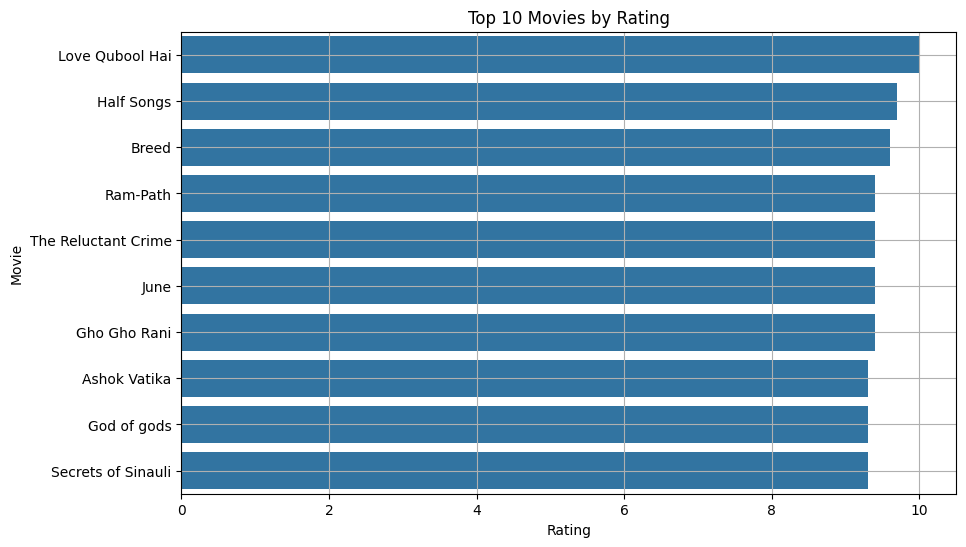

In [ ]:
top_movies_rating = df.sort_values(by='Rating', ascending=False).dropna(subset=['Rating']).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_movies_rating['Rating'], y=top_movies_rating['Name'], orient='h')
plt.title('Top 10 Movies by Rating')
plt.xlabel('Rating')
plt.ylabel('Movie')
plt.grid(True)
plt.show()

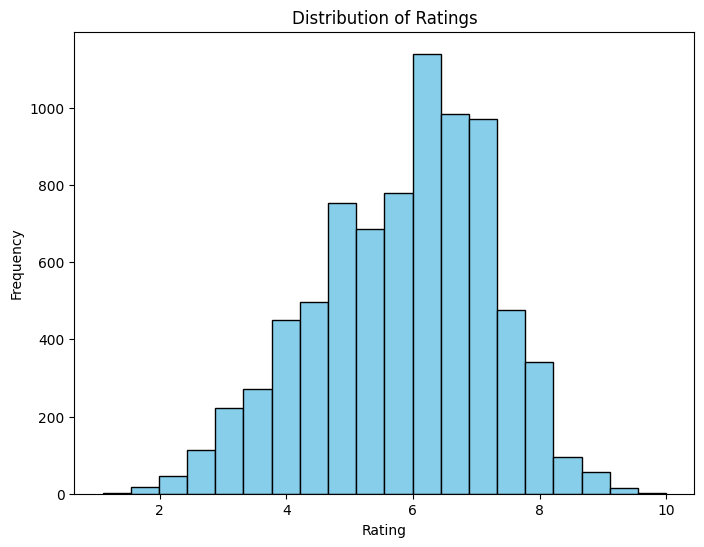

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['Rating'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

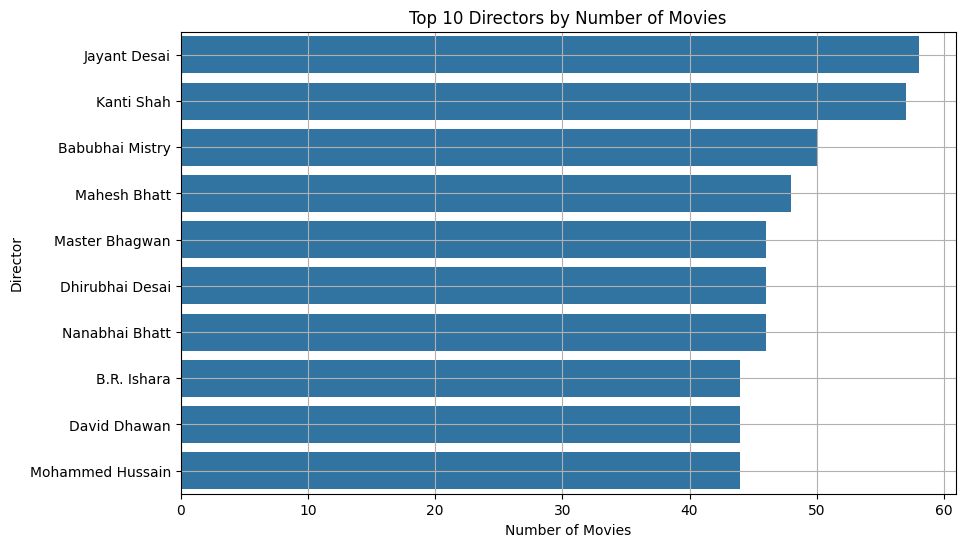

In [ ]:
top_directors = df['Director'].value_counts().head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, orient='h')
plt.title('Top 10 Directors by Number of Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.grid(True)
plt.show()

+ MISSING VALUES' HEATMAP

<Axes: >

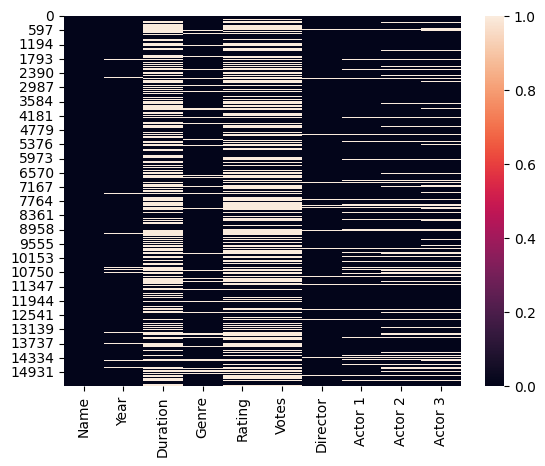

In [ ]:
sns.heatmap(df.isnull())

## HANDLING IMBALANCES

In [ ]:
df['Name'].value_counts

<bound method IndexOpsMixin.value_counts of 0                                          
1        #Gadhvi (He thought he was Gandhi)
2                               #Homecoming
3                                   #Yaaram
4                         ...And Once Again
                        ...                
15504                   Zulm Ko Jala Doonga
15505                                 Zulmi
15506                             Zulmi Raj
15507                         Zulmi Shikari
15508                          Zulm-O-Sitam
Name: Name, Length: 15503, dtype: object>

+ 'DURATION' COLUMN

In [ ]:
df['Duration']= df['Duration'].str.replace('min','').apply(pd.to_numeric)

In [ ]:
x=df['Duration'].mean()
df['Duration'].fillna(value=x, inplace=True)
df['Duration'].isnull().sum()

0

In [ ]:
df['Duration'].dtypes

dtype('float64')

+ 'RATING' COLUMN

In [ ]:
df['Rating'].isnull().sum()

7584

In [ ]:
x=df['Rating'].median()
df['Rating'].fillna(value=x, inplace=True)

+ 'VOTES' COLUMN

In [ ]:
df['Votes'] = df['Votes'].replace("$5.16M", 516)
df['Votes'] = df['Votes'].astype(str)
df['Votes'] = df['Votes'].str.replace(',', '').astype('float64')

In [ ]:
x=df['Votes'].median()
df['Votes'].fillna(value=x, inplace=True)
df['Votes'].isnull().sum()


0

+ 'YEAR' COLUMN

In [ ]:
df['Year'].isnull().any()
df['Year'] = df['Year'].str.strip('()').astype('float64')

In [ ]:
df.shape

(15503, 10)

In [ ]:
df.dropna(subset=['Year','Genre','Director','Actor 1','Actor 2','Actor 3'], inplace=True)

In [ ]:
df.shape

(11085, 10)

+ NO MISSING VALUES LEFT

<Axes: >

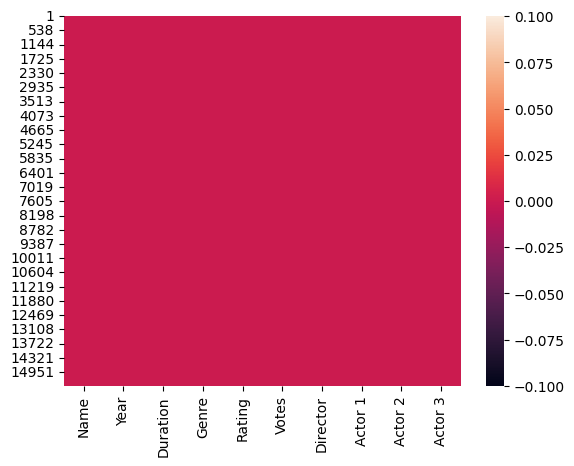

In [ ]:
sns.heatmap(df.isnull())

## HANDLING CATEGORICAL VALUES

In [ ]:
df['Genre']=df['Genre'].apply(tuple)
df['Genre']=df.groupby('Genre')['Rating'].transform('mean')
df['Name']=df.groupby('Name')['Rating'].transform('mean')
df['Director']=df.groupby('Director')['Rating'].transform('mean')
df['Actor 1']=df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor 2']=df.groupby('Actor 2')['Rating'].transform('mean')
df['Actor 3']=df.groupby('Actor 3')['Rating'].transform('mean')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11085 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      11085 non-null  float64
 1   Year      11085 non-null  float64
 2   Duration  11085 non-null  float64
 3   Genre     11085 non-null  float64
 4   Rating    11085 non-null  float64
 5   Votes     11085 non-null  float64
 6   Director  11085 non-null  float64
 7   Actor 1   11085 non-null  float64
 8   Actor 2   11085 non-null  float64
 9   Actor 3   11085 non-null  float64
dtypes: float64(10)
memory usage: 952.6 KB


## FEATURE SELECTION

[Text(0, 0, '2.64361'),
 Text(0, 0, '0.897157'),
 Text(0, 0, '0.85964'),
 Text(0, 0, '0.836652'),
 Text(0, 0, '0.827593'),
 Text(0, 0, '0.566985'),
 Text(0, 0, '0.19089'),
 Text(0, 0, '0.145895'),
 Text(0, 0, '0.110159')]

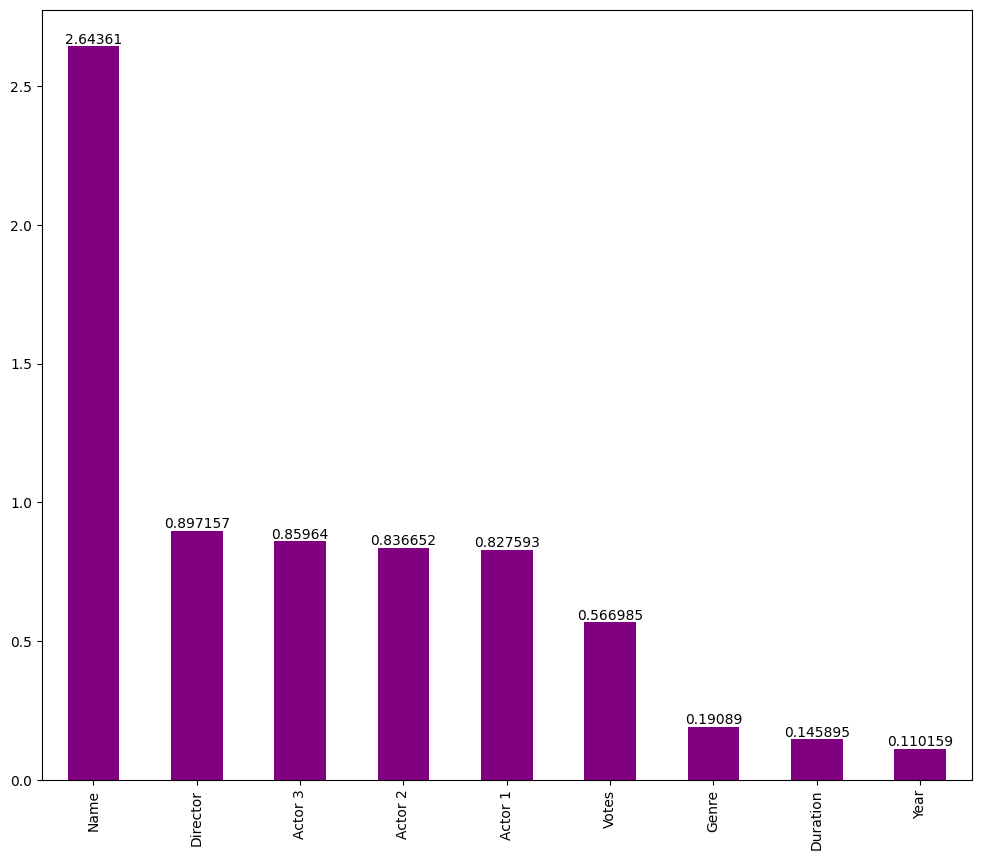

In [ ]:
#SELECT KBEST FEATURES METHOD
X1=df.drop(columns='Rating',axis=1)
Y1=df['Rating']
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.3,random_state=27)
mutual_info=mutual_info_regression(X1_train,Y1_train)
mutual_info=pd.Series(mutual_info)
mutual_info.index=X1_train.columns
bar1=mutual_info.sort_values(ascending=False).plot.bar(figsize=(12,10),color='purple')
bar1.bar_label(bar1.containers[0])


In [ ]:
from sklearn.feature_selection import SelectKBest
cols=SelectKBest(mutual_info_regression,k=4)
cols.fit(X1_train,Y1_train)
X1_train.columns[cols.get_support()]

Index(['Name', 'Director', 'Actor 2', 'Actor 3'], dtype='object')

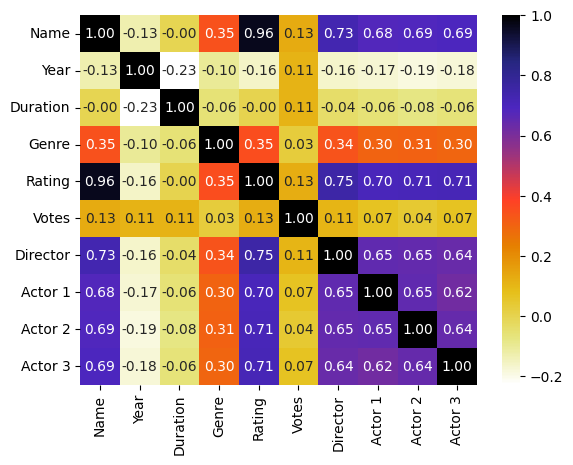

In [ ]:
cor=df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r, fmt='.2f')
plt.show()

## CHOOSING FEATURES

In [ ]:
x=df.drop(columns=['Duration','Rating'],axis=1)
y=df['Rating']